***

Assigned Students: Abbassi Yassir ; L. Hajar<br>
Due date: December 12, 2021<br>

Professor: Sidi Mohamed L. B. C.

<p style="font-size:3">$$\mathbf{Application 1:}$$</p>

***

_**Importing Modules**_

In [1]:
from sklearn.datasets import make_regression

from scipy import stats
from scipy.stats import t

import pandas as pd

import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

<br><br>_**Figure A.1: Eviscerated octopus weight versus uneviscerated weight (in grams).**_

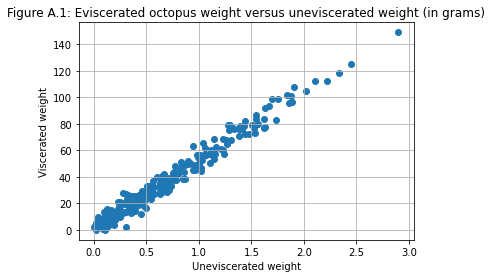

                X           Y
count  240.000000  240.000000
mean     0.725378   38.696190
std      0.538393   28.313976
min      0.002646    0.077451
25%      0.312987   16.847946
50%      0.571335   30.488799
75%      1.033829   55.218822
max      2.898513  148.971262


In [2]:
# Generate regression dataset
n = 240
X, Y = make_regression(n_samples=n, n_features=1, noise=5)
a = np.array(abs(X))
b = np.array(abs(Y.reshape(n,1)))
df = np.concatenate((a, b), axis=1)

data = pd.DataFrame(df, columns=['X', 'Y'])
result = stats.linregress(df)


# Plotting the scatter point graphic
plt.scatter(a,b)
plt.xlabel("Uneviscerated weight")
plt.ylabel("Viscerated weight")
plt.grid()
plt.title('Figure A.1: Eviscerated octopus weight versus uneviscerated weight (in grams)')
plt.show()

#Data desciption
print(data.describe())

<br><br>_**Simple linear regression stats table**_

In [3]:
# Defining linear regression stats
slope, intercept, rvalue, pvalue, stderr, intercept_stderr = (result.slope, result.intercept, result.rvalue, result.pvalue, result.stderr, result.intercept_stderr)

stats = [{slope, intercept, rvalue, pvalue, stderr, intercept_stderr}]
header1 = ['Slope', 'Intercept', 'R value', 'P value', 'Standard error of slope', 'Standard error of intercept']
T1 = tabulate(stats, header1, tablefmt='grid')

# Computing T-value and cumulative distribution function output
tv_slp = slope/stderr
tv_intrpt = intercept/intercept_stderr
cdf_slp = 2*(1 - t.cdf(abs(tv_slp),df = 238))
cdf_intrpt = 2*(1 - t.cdf(abs(tv_intrpt),df = 238))

tbody = [['Intercept', tv_intrpt, cdf_intrpt],
         ['Slope', tv_slp, cdf_slp]]
header2 = ['', 'T value', 'Pr(>|t|)']
T2 = tabulate(tbody, header2, tablefmt='grid')

print(T1,'\n')
print(T2,'\nTable 1: Weight of eviscerated and uneviscerated octopus\n\tresults of simple linear regression')

+----------+-------------+-----------+--------------+---------------------------+-------------------------------+
|    Slope |   Intercept |   R value |      P value |   Standard error of slope |   Standard error of intercept |
+==========+=============+===========+==============+===========================+===============================+
| 0.985577 |     1.09893 |  0.576879 | 1.24682e-185 |                  0.520738 |                       51.8313 |
+----------+-------------+-----------+--------------+---------------------------+-------------------------------+ 

+-----------+-----------+------------+
|           |   T value |   Pr(>|t|) |
+===========+===========+============+
| Intercept |   2.11032 |  0.0358744 |
+-----------+-----------+------------+
| Slope     |  89.8477  |  0         |
+-----------+-----------+------------+ 
Table 1: Weight of eviscerated and uneviscerated octopus
	results of simple linear regression


Text(0.5, 1.0, 'Simple linear regression model of eviscerated octopus weight versus uneviscerated weight (in grams)')

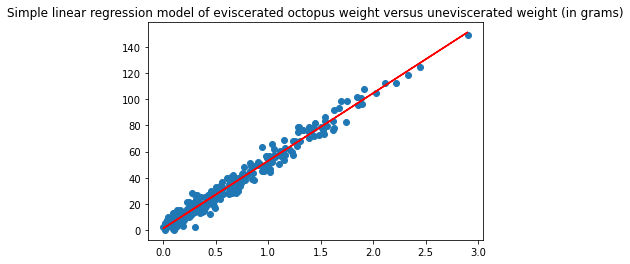

In [4]:
# Defining the linear model
lr = a*slope + intercept
plt.plot(a, lr, '-r')
plt.scatter(a,b)
plt.title('Simple linear regression model of eviscerated octopus weight versus uneviscerated weight (in grams)')

<br><br>_**Solution of Application 1:**_

<p style="font-family:Calibri">
    <b>1.i - Linear Regression Model</b>
</p><br>
The scatter point represents the relationship between the eviscerated weight and the uneviscerated weight of octopuses with a linear tendancy.<br>
For n observation, the simple linear regression model has the following formulae:<br>
For all possible values of $x \in [1,n]:$&emsp;$Y_{i} = \beta_{0} + \sum \limits_{i=1}^{n}\beta_{i}X_{i}+\epsilon_{i}$&emsp;with $n=240$ in application 1.

<p style="font-family:Calibri;">
    <b>1.ii - Parameter Estimators Formulas of the model:</b>$\hat{\beta}_{0}$&emsp;$\hat{\beta}_{1}$&emsp;$\hat{\sigma}^2$
</p>

The parameters of the model have the following estimation formulas, with $n=240$:

$\hat{\beta}_{0} = \overline{y} - \hat{\beta}_{1}\overline{x}$

$\hat{\beta}_{1} = \displaystyle \frac{\sum\limits_{i=1}^{n}(x_{i}-\overline{x}_{n})(y_{i}-\overline{y}_{n})}{\sum\limits_{i=1}^{n}(x_{i}-\overline{x}_{n})^2} = \frac{\sum\limits_{i=1}^{n}(x_{i}-\overline{x}_{n})y_{i}}{\sum\limits_{i=1}^{n}(x_{i}-\overline{x}_{n})^2}$

$\hat{\sigma}^2 = s^2 = \displaystyle \frac{\sum\limits_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n-2} = \displaystyle \frac{\left( \sum\limits_{i=1}^{n}y_{i}-\hat{\beta}_{0} + \hat{\beta}_{1}{x}_{i} \right)^2}{n-2}$
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;A non biased estimator of the $\hat{\sigma}^2$

<br><p style="font-family:Calibri;">
    <b>1.iii - Estimation values of the parameters of the model</b>
</p>

Table 1 represents the value of parameters $\hat{\beta}_{0}$ as intercept and $\hat{\beta}_{1}$ as slope.
$\hat{\beta}_{0}$

In [5]:
print('Beta 0 = {}'.format(intercept))
print('Beta 1 = {}'.format(slope))

Beta 0 = 1.0989252555432358
Beta 1 = 51.8312568017797


Given that $\hat{\sigma}^2=\displaystyle \frac{\left( \sum\limits_{i=1}^{n}y_{i}-\hat{\beta}_{0} + \hat{\beta}_{1}{x}_{i} \right)^2}{n-2}$, we have:

In [6]:
# Compute 'y hat' from the simple linear model
data['hat_y'] = data['X'][:]*slope + intercept

# Compute y minus 'y hat'
diff = data['Y'][:] - data['hat_y'][:]
squared = diff*diff


# Compute the Residual Squared Sum
RSS = squared[0:239].sum()

# Estimation of sigma squared
sigma_squared_hat = RSS/238
print('Estimation of sigma squared = {}'.format(sigma_squared_hat))

Estimation of sigma squared = 23.042999455554508


<br><p style="font-family:Calibri;">
    <b>1.iv - T-value Test</b>
</p>

Given the $H_{0}$ hypothese, which implies $\beta_{1} = 0$, the $ T = \hat{\beta}_{0}/\hat{\sigma}_{\beta_{0}}$ ~ $T_{238}$ (Student t-distribution law with 238 degree freedom).
Statistic test would be:
$P(|T_{238}| \ge Tvalue) = Pr$

In general: $P(|X| \ge v) = 2*(1-P(X \le v))$

The intercept T-value = 2.110323418569496. The correspondant value from the Student t-distribution table is: 0.03587439398437198
The beta 0 estimate is insignificant

+-----------+-----------+------------+
|           |   T value |   Pr(>|t|) |
+===========+===========+============+
| Intercept |   2.11032 |  0.0358744 |
+-----------+-----------+------------+
| Slope     |  89.8477  |  0         |
+-----------+-----------+------------+


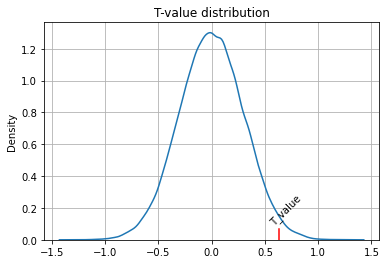

In [7]:
print('The intercept T-value = {}. The correspondant value from the Student t-distribution table is: {}'.format(tv_intrpt,cdf_intrpt))
if(abs(cdf_intrpt)>0.05):
    print('The beta 0 estimate is significant\n')
else:
    print('The beta 0 estimate is insignificant\n')
print(T2)

# Plotting the cumulative function of Student
import seaborn as sns
t_distribution=t.rvs(df=238, scale=0.3, size=100000)
scaled_tv_intrpt = tv_intrpt*0.3

sns.kdeplot(t_distribution)
plt.title('T-value distribution')
plt.axvline(scaled_tv_intrpt, ymin = 0, ymax = 0.05 , color='r')
plt.text(scaled_tv_intrpt-0.1,0.1,'T_value',rotation=45)
plt.grid()

<p style="font-family:Calibri;">
    <b>1.v - Alternative model</b>
</p>

In [8]:
print('Given the T-value and its probability, the following is conclusions can be drawn:')
if(abs(cdf_intrpt)>0.05):
    print('- The beta 0 estimate is significant\n')
else:
    print('- The beta 0 estimate is insignificant -> B0 = 0\n- The Null Hypothesis is valid\n- Alternative simple linear model: yi = b1*x +ei')

Given the T-value and its probability, the following is conclusions can be drawn:
- The beta 0 estimate is insignificant -> B0 = 0
- The Null Hypothesis is valid
- Alternative simple linear model: yi = b1*x +ei


<br><br>
***
2 - In general, let us consider a sample of n pairs of real numbers $(xi, yi)$ according to the model $Y_{i} =  \beta X_{i}+\epsilon_{i}$, where the errors $\epsilon_{i}$ are given independent gaussian centered and of the same variance $\sigma^2$.

In [9]:
# Defining linear regression stats
EStd, Err, Tv, Pr = (0.85073, 0.00436, 195.1, "<2e − 16")

stats = [[EStd, Err, Tv, Pr]]
header = ['Estimate Std.', 'Error', 'T value', 'Pr(>|t|)']
T = tabulate(stats, header, tablefmt='grid')
print(T,'\nResidual standard error 52.63 on 239\nMultiple R-Squared: 0.9938, Adjusted R-squared: 0.9937\nF-statistic: 3.807e + 04 on 1 and 239 DF, p-value: < 2.2e − 16')
print('\nTable 2: Weight of eviscerated and uneviscerated octopus\nResults of simple linear regression with the simplified model')

+-----------------+---------+-----------+------------+
|   Estimate Std. |   Error |   T value | Pr(>|t|)   |
+=================+=========+===========+============+
|         0.85073 | 0.00436 |     195.1 | <2e − 16   |
+-----------------+---------+-----------+------------+ 
Residual standard error 52.63 on 239
Multiple R-Squared: 0.9938, Adjusted R-squared: 0.9937
F-statistic: 3.807e + 04 on 1 and 239 DF, p-value: < 2.2e − 16

Table 2: Weight of eviscerated and uneviscerated octopus
Results of simple linear regression with the simplified model


<br><p style="font-family:Calibri;">
    <b>2.i - Estimator $\hat{\beta}$ of $\beta$ minimizing the sum of the squares of the deviations from the model</b>
</p>

Computing the estimator $\beta$ minimizing the sum of the squares of the deviation brings us to developing the following formula:
$\min_{\forall \beta} F(\beta) = \sum \limits_{i=1}^{n}(y_{i}-(\beta x_{i}))^2$
$\displaystyle \frac{\partial F}{\partial \beta} = 0$&emsp;&emsp; => &emsp;&emsp;$\hat{\beta} = \displaystyle\frac{\sum \limits_{i=1}^{n}(x_{i}*y_{i})}{\sum \limits_{i=1}^{n}(x_{i})^2}$

In [10]:
# Compute product xi * yi 
prod = data['X'][:]*data['Y'][:]
numerator = prod.sum()

# Compute the cumulative sum of xi squared
denominator = (data['X'][:]*data['X'][:]).sum()

# Estimation of beta hat
beta_hat = numerator/denominator
print('Estimation of beta hat = {}'.format(beta_hat))

Estimation of beta hat = 52.80953862350149


<br><p style="font-family:Calibri;">
    <b>2.ii - Variance of $\hat{\beta}$</b>
</p>

$Var(\hat{\beta}) = Var\left(\frac{\sum \limits_{i=1}^{n}(x_{i}*y_{i})}{\sum \limits_{i=1}^{n}(x_{i})^2}\right)$
&emsp;&emsp;=>&emsp;&emsp;
$Var(\hat{\beta}) = \frac{\sigma^2}{\sum x_{i}^2}$



<br><p style="font-family:Calibri;">
    <b>2.iii - Determining $\hat{\beta}$ and $\hat{\sigma}^2$ from table 2.</b>
</p>

Table 2 reveals that:<br>
$\hat{\beta} = 0.85073$<br>
$\hat{\sigma}^2 = 52.63$<br>
Since $T_{value} = 195.1$, $H_{1}$ is accepted.

<br><p style="font-family:Calibri;">
    <b>2.iv - Variance of error of the prediction</b>
</p>
$Var(\hat{\epsilon}_{0}) = \sigma^2 + x_{0}Var(\hat{\beta}_{0})$

<br><p style="font-family:Calibri;">
    <b>2.v - Confidence interval of 90% (Part 1's Model)</b>
</p>

In [11]:
m = b.mean()
s = b.std()
dof = n-1 
confidence = 0.90
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

lend = m-s*t_crit/np.sqrt(n)
hend = m+s*t_crit/np.sqrt(n)
print('The confidel interval of the model is: [ {} , {} ]'.format(lend,hend))

The confidel interval of the model is: [ 35.68455341271378 , 41.70782566407975 ]
